HTML(value="<h1 style='text-align: center;'>¿Cómo ha cambiado el clima en España desde 1970?</h1>")

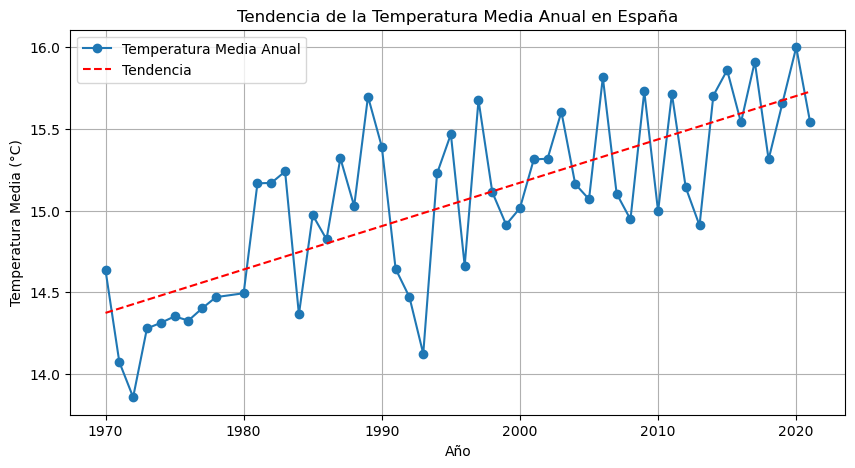

HTML(value="<div style='background-color: yellow; padding: 10px;'>\n    <b>Test de Mann-Kendall:</b><br>\n    …

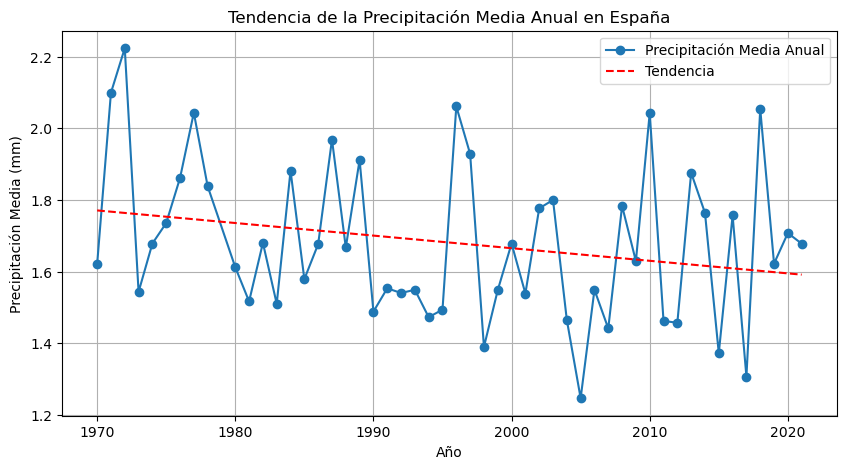

HTML(value="<div style='background-color: yellow; padding: 10px;'>\n    <b>Test de Mann-Kendall:</b><br>\n    …

HTML(value="<h2 style='text-align: center;'>¿Cómo han cambiado las temperaturas España desde 1970?</h1>")

interactive(children=(Dropdown(description='CCAA:', options=('España', 'Cataluña', 'Galicia', 'Asturias', 'Paí…

HTML(value="<div style='background-color: yellow; padding: 10px;'>\n    <b>Observación:</b><br>\n    En todas …

interactive(children=(Dropdown(description='CCAA:', options=('España', 'Cataluña', 'Galicia', 'Asturias', 'Paí…

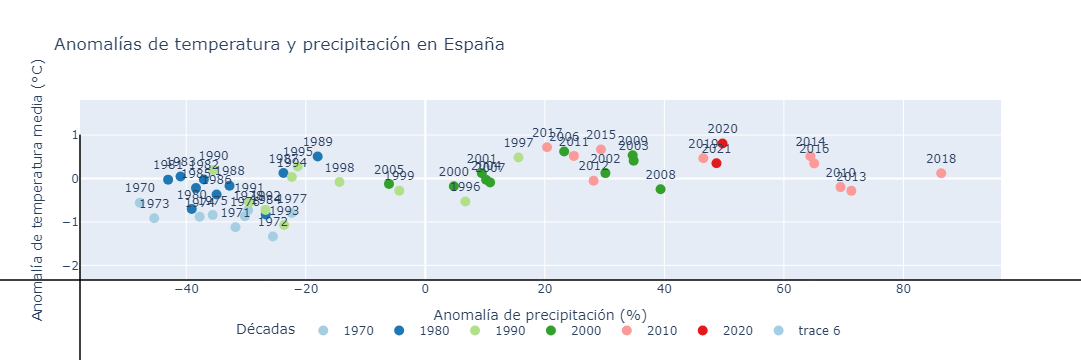

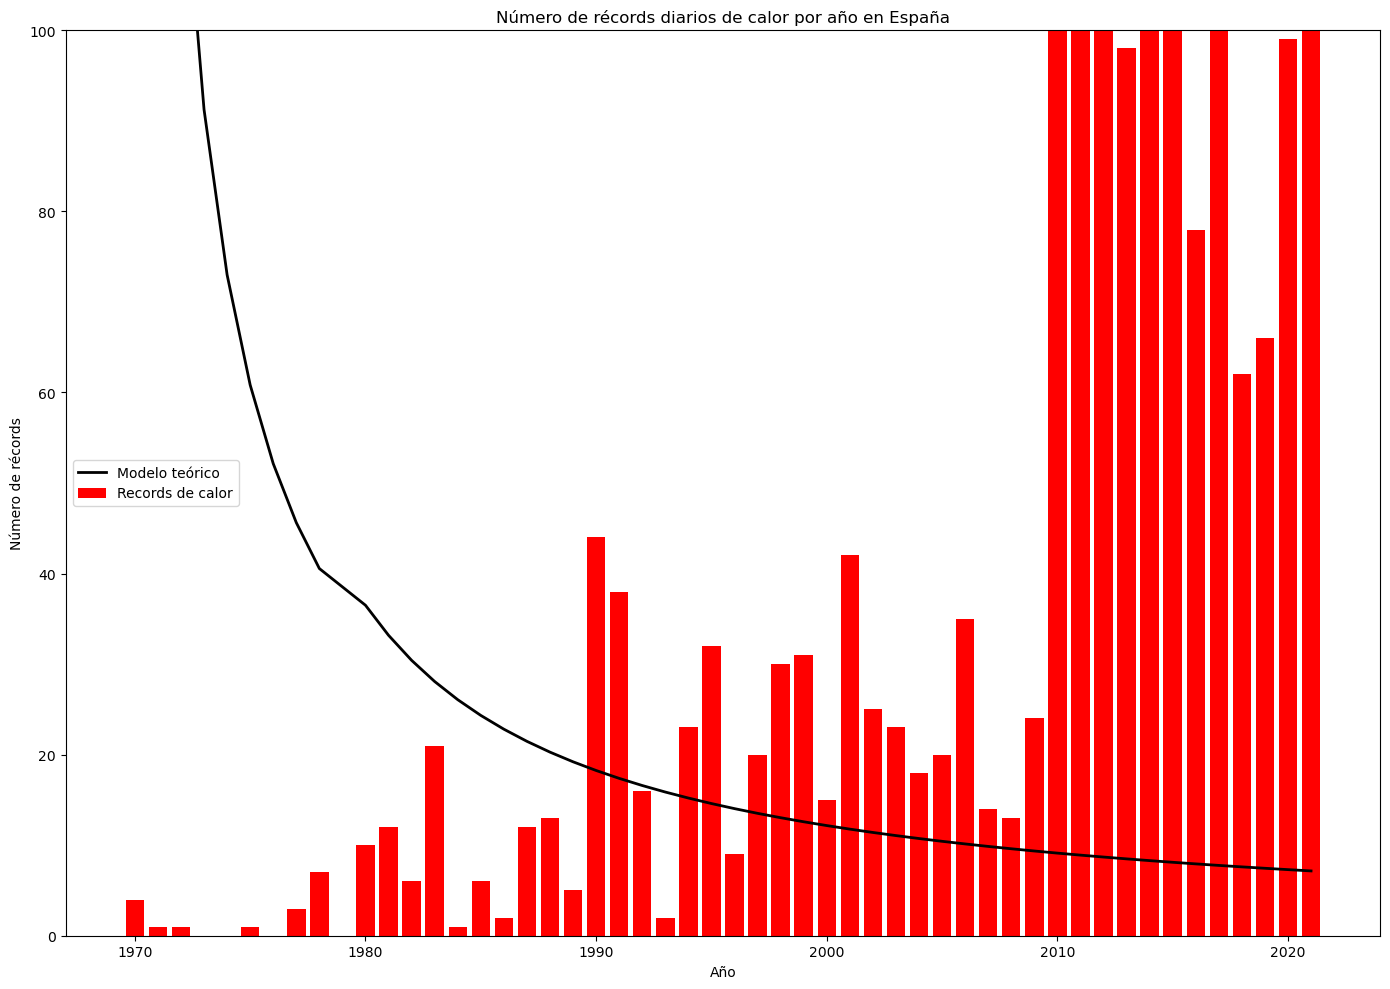

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
import warnings


# Cargar el conjunto de datos corregido
file_path = 'MME_corrected.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'fecha' a formato datetime
data['fecha'] = pd.to_datetime(data['fecha'])

# Crear columnas de año y mes
data['año'] = data['fecha'].dt.year
data['mes'] = data['fecha'].dt.month

# Diccionario de mapeo de provincias a comunidades autónomas
comunidades_autonomas = {
    'BARCELONA': 'Cataluña',
    'GIRONA': 'Cataluña',
    'TARRAGONA': 'Cataluña',
    'LLEIDA': 'Cataluña',
    'A CORUÑA': 'Galicia',
    'LUGO': 'Galicia',
    'OURENSE': 'Galicia',
    'PONTEVEDRA': 'Galicia',
    'ASTURIAS': 'Asturias',
    'BIZKAIA': 'País Vasco',
    'GIPUZKOA': 'País Vasco',
    'ARABA/ALAVA': 'País Vasco',
    'CANTABRIA': 'Cantabria',
    'NAVARRA': 'Navarra',
    'LEON': 'Castilla y León',
    'AVILA': 'Castilla y León',
    'BURGOS': 'Castilla y León',
    'PALENCIA': 'Castilla y León',
    'SALAMANCA': 'Castilla y León',
    'SEGOVIA': 'Castilla y León',
    'SORIA': 'Castilla y León',
    'VALLADOLID': 'Castilla y León',
    'ZAMORA': 'Castilla y León',
    'MADRID': 'Madrid',
    'CACERES': 'Extremadura',
    'BADAJOZ': 'Extremadura',
    'CUENCA': 'Castilla-La Mancha',
    'GUADALAJARA': 'Castilla-La Mancha',
    'TOLEDO': 'Castilla-La Mancha',
    'CIUDAD REAL': 'Castilla-La Mancha',
    'ALBACETE': 'Castilla-La Mancha',
    'CORDOBA': 'Andalucía',
    'HUELVA': 'Andalucía',
    'CADIZ': 'Andalucía',
    'GRANADA': 'Andalucía',
    'JAEN': 'Andalucía',
    'SEVILLA': 'Andalucía',
    'ALMERIA': 'Andalucía',
    'MALAGA': 'Andalucía',
    'CEUTA': 'Ceuta',
    'MELILLA': 'Melilla',
    'ALICANTE': 'Comunidad Valenciana',
    'CASTELLON': 'Comunidad Valenciana',
    'VALENCIA': 'Comunidad Valenciana',
    'MURCIA': 'Murcia',
    'HUESCA': 'Aragón',
    'TERUEL': 'Aragón',
    'ZARAGOZA': 'Aragón',
    'LA RIOJA': 'La Rioja',
    'ILLES BALEARS': 'Islas Baleares',
    'LAS PALMAS': 'Canarias',
    'STA. CRUZ DE TENERIFE': 'Canarias'
}

# Crear una nueva columna 'comunidad_autonoma' basada en el mapeo de provincias
data['comunidad_autonoma'] = data['provincia'].map(comunidades_autonomas)

# Visualización 1: Temperatura media anual en España y test de Mann-Kendall
def plot_temp_media_anual():
    temp_media_anual = data.groupby('año')['tmed'].mean()
    mk_result = mk.original_test(temp_media_anual)
    
    plt.figure(figsize=(10, 5))
    plt.plot(temp_media_anual, marker='o', label='Temperatura Media Anual')
    z = np.polyfit(temp_media_anual.index, temp_media_anual, 1)
    p = np.poly1d(z)
    plt.plot(temp_media_anual.index, p(temp_media_anual.index), linestyle='dashed', color='red', label='Tendencia')
    plt.title('Tendencia de la Temperatura Media Anual en España')
    plt.xlabel('Año')
    plt.ylabel('Temperatura Media (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Crear el resumen del test de Mann-Kendall
    resumen = f"""
    <b>Test de Mann-Kendall:</b><br>
    Z-Value: {mk_result.z}<br>
    P-Value: {mk_result.p}<br>
    Tendencia: {'Ascendente' if mk_result.trend == 'increasing' else 'Descendente' if mk_result.trend == 'decreasing' else 'No significativa'}<br>
    {'La tendencia observada es estadísticamente significativa (p &lt; 0.05).' if mk_result.p < 0.05 else 'La tendencia observada no es estadísticamente significativa (p &gt;= 0.05).'}
    """

    # Crear un widget de HTML con el resumen
    texto_resumen = widgets.HTML(
        value=f"<div style='background-color: yellow; padding: 10px;'>{resumen}</div>"
    )

    # Mostrar el widget
    display(texto_resumen)

# Visualización 2: Precipitación media anual en España y test de Mann-Kendall
def plot_prec_media_anual():
    prec_media_anual = data.groupby('año')['prec'].mean()
    mk_result = mk.original_test(prec_media_anual)
    
    plt.figure(figsize=(10, 5))
    plt.plot(prec_media_anual, marker='o', label='Precipitación Media Anual')
    z = np.polyfit(prec_media_anual.index, prec_media_anual, 1)
    p = np.poly1d(z)
    plt.plot(prec_media_anual.index, p(prec_media_anual.index), linestyle='dashed', color='red', label='Tendencia')
    plt.title('Tendencia de la Precipitación Media Anual en España')
    plt.xlabel('Año')
    plt.ylabel('Precipitación Media (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Crear el resumen del test de Mann-Kendall
    resumen = f"""
    <b>Test de Mann-Kendall:</b><br>
    Z-Value: {mk_result.z}<br>
    P-Value: {mk_result.p}<br>
    Tendencia: {'Ascendente' if mk_result.trend == 'increasing' else 'Descendente' if mk_result.trend == 'decreasing' else 'No significativa'}<br>
    {'La tendencia observada es estadísticamente significativa (p &lt; 0.05).' if mk_result.p < 0.05 else 'La tendencia observada no es estadísticamente significativa (p &gt;= 0.05).'}
    """

    # Crear un widget de HTML con el resumen
    texto_resumen = widgets.HTML(
        value=f"<div style='background-color: yellow; padding: 10px;'>{resumen}</div>"
    )

    # Mostrar el widget
    display(texto_resumen)

# Visualización 3: Warming Stripes para temperatura media
def warming_stripes():
    def actualizar_grafico(comunidad):
        if comunidad == 'España':
            temp_media_anual_comunidad = data.groupby('año')['tmed'].mean()
        else:
            temp_media_anual_comunidad = data[data['comunidad_autonoma'] == comunidad].groupby('año')['tmed'].mean()
        
        fig, ax = plt.subplots(figsize=(15, 5))
        colors = plt.cm.coolwarm((temp_media_anual_comunidad - temp_media_anual_comunidad.min()) / (temp_media_anual_comunidad.max() - temp_media_anual_comunidad.min()))
        ax.bar(temp_media_anual_comunidad.index, [1]*len(temp_media_anual_comunidad), color=colors, width=1.0)
        ax.set_xlim(temp_media_anual_comunidad.index.min(), temp_media_anual_comunidad.index.max())
        ax.set_xticks(temp_media_anual_comunidad.index)
        ax.set_xticklabels(temp_media_anual_comunidad.index, rotation=90, ha='center', fontsize=10)
        ax.set_title(f'Cambio de temperatura en {comunidad} desde 1970 hasta 2021', fontsize=18)
        plt.show()

    opciones_comunidades = ['España'] + list(data['comunidad_autonoma'].unique())
    selector_comunidad = widgets.Dropdown(
        options=opciones_comunidades,
        description='CCAA:',
        disabled=False,
    )

    interact(actualizar_grafico, comunidad=selector_comunidad)

# Función para mostrar el mensaje en una caja amarilla
def mostrar_mensaje_warming_stripes():
    mensaje = """
    <b>Observación:</b><br>
    En todas las comunidades autónomas se muestra una concentración de colores rojizos en los últimos años.
    """
    texto_mensaje = widgets.HTML(
        value=f"<div style='background-color: yellow; padding: 10px;'>{mensaje}</div>"
    )
    display(texto_mensaje)

# Visualización 4: Evolución de la temperatura media en España y las comunidades autónomas
def evolucion_temp_media():
    def actualizar_grafico(comunidad):
        if comunidad == 'España':
            temp_media_mensual = data.groupby(['año', 'mes'])['tmed'].mean().reset_index()
        else:
            temp_media_mensual = data[data['comunidad_autonoma'] == comunidad].groupby(['año', 'mes'])['tmed'].mean().reset_index()
        
        temp_media_mensual['mes_nombre'] = temp_media_mensual['mes'].map({
            1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
            7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
        })

        fig = go.Figure()

        for año in temp_media_mensual['año'].unique():
            data_año = temp_media_mensual[temp_media_mensual['año'] == año]
            fig.add_trace(go.Scatterpolar(
                r=data_año['tmed'],
                theta=data_año['mes_nombre'],
                mode='lines+markers',
                name=str(año),
                visible=False
            ))

        fig.data[0].visible = True

        steps = []
        for i in range(len(fig.data)):
            step = dict(
                method="update",
                args=[{"visible": [False] * len(fig.data)},
                      {"title": f"Cambio de temperatura media mensual en {comunidad} hasta {fig.data[i].name}"}],
            )
            for j in range(i + 1):
                step["args"][0]["visible"][j] = True
            step["label"] = fig.data[i].name
            steps.append(step)

        sliders = [dict(
            active=0,
            pad={"t": 50},
            steps=steps,
            currentvalue={"prefix": "Año: ", "font": {"size": 20}},
            transition={"duration": 300},
            x=0.1, 
            len=0.9
        )]

        fig.update_layout(
            sliders=sliders,
            updatemenus=[dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(label="Inicio",
                         method="animate",
                         args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "mode": "immediate"}]),
                    dict(label="Parar",
                         method="animate",
                         args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])
                ],
                direction="left",
                pad={"r": 10, "t": 87},
                x=0.1,
                xanchor="right",
                y=0,
                yanchor="top"
            )],
            polar=dict(
                radialaxis=dict(visible=True, range=[temp_media_mensual['tmed'].min(), temp_media_mensual['tmed'].max()])
            ),
            template='plotly',
            title=f'Cambio de temperatura media mensual en {comunidad}',
            paper_bgcolor='white',
            plot_bgcolor='white'
        )
        
        fig.show()

    selector_comunidad = widgets.Dropdown(
        options=['España'] + list(data['comunidad_autonoma'].unique()),
        description='CCAA:',
        disabled=False,
    )

    interact(actualizar_grafico, comunidad=selector_comunidad)

# Visualizacion 5: Análisis de anomalías de precipitación y temperatura
def analisis_anomalias_temperatura_y_precipitacion():
    # Convertir la columna 'fecha' a formato datetime
    data['fecha'] = pd.to_datetime(data['fecha'])

    # Crear columnas de año y mes
    data['año'] = data['fecha'].dt.year
    data['mes'] = data['fecha'].dt.month

    # Calcular la media de temperatura para todo el período
    mean_temp = data['tmed'].mean()

    # Calcular la precipitación total anual
    annual_prec = data.groupby('año')['prec'].sum().reset_index()

    # Calcular la precipitación media anual
    mean_annual_prec = annual_prec['prec'].mean()

    # Calcular las anomalías de temperatura y precipitación para cada año
    anomalies = data.groupby('año').agg({
        'tmed': lambda x: x.mean() - mean_temp,
        'prec': lambda x: x.sum() - mean_annual_prec
    }).reset_index()

    # Convertir las anomalías de precipitación a porcentaje
    anomalies['prec'] = (anomalies['prec'] / mean_annual_prec) * 100

    # Crear una columna para la década
    anomalies['decada'] = (anomalies['año'] // 10) * 10

    # Ajustar la primera década para que sea la de los años 1970
    anomalies = anomalies[anomalies['decada'] >= 1970]

    # Definir colores discretos para cada década
    decade_colors = {
        1970: 'rgb(166,206,227)',
        1980: 'rgb(31,120,180)',
        1990: 'rgb(178,223,138)',
        2000: 'rgb(51,160,44)',
        2010: 'rgb(251,154,153)',
        2020: 'rgb(227,26,28)'
    }

    # Asignar colores a cada punto basado en la década
    anomalies['color'] = anomalies['decada'].map(decade_colors)

    # Crear el gráfico
    fig = go.Figure()

    # Añadir la leyenda manualmente
    for decada, color in decade_colors.items():
        fig.add_trace(go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=color),
            legendgroup=str(decada),
            showlegend=True,
            name=str(decada)
        ))

    fig.add_trace(go.Scatter(
        x=anomalies['prec'],
        y=anomalies['tmed'],
        mode='markers+text',
        text=anomalies['año'].astype(str),
        textposition='top center',
        marker=dict(
            size=10,
            color=anomalies['color'],
            showscale=False
        )
    ))

    # Añadir cuadrantes de colores
    fig.add_shape(type="rect",
        x0=0, y0=0, x1=1, y1=1,
        xref='paper', yref='paper',
        fillcolor='rgba(255, 0, 0, 0.1)',
        line=dict(color='rgba(255, 0, 0, 0)')
    )
    fig.add_shape(type="rect",
        x0=0, y0=0, x1=0.5, y1=1,
        xref='paper', yref='paper',
        fillcolor='rgba(0, 0, 255, 0.1)',
        line=dict(color='rgba(0, 0, 255, 0)')
    )
    fig.add_shape(type="rect",
        x0=0, y0=0.5, x1=1, y1=1,
        xref='paper', yref='paper',
        fillcolor='rgba(0, 255, 0, 0.1)',
        line=dict(color='rgba(0, 255, 0, 0)')
    )
    fig.add_shape(type="rect",
        x0=0, y0=0, x1=1, y1=0.5,
        xref='paper', yref='paper',
        fillcolor='rgba(255, 255, 0, 0.1)',
        line=dict(color='rgba(255, 255, 0, 0)')
    )

    # Configurar el diseño del gráfico para desplazar el origen a (0,0)
    fig.update_layout(
        title='Anomalías de temperatura y precipitación en España',
        xaxis_title='Anomalía de precipitación (%)',
        yaxis_title='Anomalía de temperatura media (°C)',
        xaxis=dict(showgrid=True, zeroline=True, range=[min(anomalies['prec']) - 10, max(anomalies['prec']) + 10]),
        yaxis=dict(showgrid=True, zeroline=True, range=[min(anomalies['tmed']) - 1, max(anomalies['tmed']) + 1]),
        shapes=[dict(
            type="line",
            x0=min(anomalies['prec']), y0=0,
            x1=max(anomalies['prec']), y1=0,
            line=dict(color="Black", width=1)
        ), dict(
            type="line",
            x0=0, y0=min(anomalies['tmed']),
            x1=0, y1=max(anomalies['tmed']),
            line=dict(color="Black", width=1)
        )],
        legend=dict(title="Décadas", orientation="h", x=0.5, xanchor="center", y=-0.2)
    )

    # Mostrar el gráfico
    fig.show()



# Visualización 6: Evolución de los récords de temperatura máxima durante el período
def evolucion_records_calor():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=DeprecationWarning)
        
        data_filtered = data[(data['año'] >= 1970) & (data['año'] <= 2021)]
        data_filtered['dia'] = data_filtered['fecha'].dt.dayofyear
        data_filtered['record_calor'] = data_filtered.groupby('dia')['tmax'].cummax()
        
        # Seleccionar explícitamente las columnas después de la operación groupby
        records_calor = data_filtered.groupby('año').apply(lambda x: (x['tmax'] == x['record_calor']).sum()).reset_index()
        records_calor.columns = ['año', 'Records Calor']
        
        num_years = len(records_calor)
        theoretical_calor = [365 / (i+1) for i in range(num_years)]

        df_records = pd.DataFrame({
            'Año': records_calor['año'],
            'Records Calor': records_calor['Records Calor'],
            'Teórico Calor': theoretical_calor
        })

        fig, ax = plt.subplots(figsize=(14, 10))
        ax.bar(df_records['Año'], df_records['Records Calor'], color='red', label='Records de calor')
        ax.plot(df_records['Año'], df_records['Teórico Calor'], color='black', label='Modelo teórico', linewidth=2)
        ax.set_title('Número de récords diarios de calor por año en España')
        ax.set_xlabel('Año')
        ax.set_ylabel('Número de récords')
        ax.legend()
        ax.set_ylim(0, 100)
        plt.tight_layout()
        plt.show()

# Función para mostrar el título
def mostrar_titulo():
    titulo = widgets.HTML(
        value="<h1 style='text-align: center;'>¿Cómo ha cambiado el clima en España desde 1970?</h1>"
    )
    display(titulo)

# Función para mostrar el título de variación de temperaturas
def mostrar_titulo_temperaturas():
    titulo = widgets.HTML(
        value="<h2 style='text-align: center;'>¿Cómo han cambiado las temperaturas España desde 1970?</h1>"
    )
    display(titulo)

# Ejecutar todas las visualizaciones
mostrar_titulo()
plot_temp_media_anual()
plot_prec_media_anual()
mostrar_titulo_temperaturas()
warming_stripes()
mostrar_mensaje_warming_stripes()
evolucion_temp_media()
analisis_anomalias_temperatura_y_precipitacion()
evolucion_records_calor()